<a href="https://colab.research.google.com/github/KevinBCruzMejia/ProyectoIntegrador/blob/main/Fase%201/Confirmaci%C3%B3n%20de%20registros%20contables/Avance2_Equipo16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico de Estudios Superiores de Monterrey**

**Maestría en Inteligencia Artificial Aplicada**

**Proyecto Integrador**

**Nombre del trabajo**
            
            Ingeniería de características

**Nombre del maestro:**

    Dra. Grettel Barceló Alonso
    Dr. Luis Eduardo Falcón Morales

**Nombre de los estudiantes:**
                
                Kevin Brandon Cruz Mejia
                José Alberto Almada Gerardo

**Matrículas:**

             A01794176
     		 A01794415

**Fecha de entrega:** 6 de octubre de 2024

Como se menciono en el anterior entragable para hacer mas entendible el negocio para realizar el banco de casos de uso
se hara por fases en esta fase 1 tenemos el caso de uso de "Confirmación de registros contables" para el sector de Contabilidad, finanzas e Impuestos de Mexico con el proposito de realizar los entregables en tiempo y forma de este curso/proyecto ademas de seguir actualizando el github https://github.com/KevinBCruzMejia/ProyectoIntegrador/tree/main con demas casos de uso replicando este mismo analisis al menos en esta este paso de preprocesamiento de datos

# Entendimiento del negocio (Avance 0)

### Fase 1: Contabilidad, finanzas e Impuestos de Mexico


##### Caso de Uso: Confirmación de registros contables


Objetivos del negocio: Verificacion y validacion automatica de registros contables para asegurar precision

Objetivos de la ciencia de datos: Reducir el tiempo de revision manual, minimizar y prevenir errores, identificar anomalias en las transacciones contables como cargos, impuestos, cobros

Criterios de éxito: Usar Modelos de detección de anomalías, Algoritmos predictivos pueden analizar los registros contables históricos y prever posibles errores antes de que ocurran

# Entendimiento de los datos (Avance 1)

In [ ]:
import pandas as pd
import numpy as np
import locale
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from datetime import datetime
import warnings

In [ ]:
# Ignorar el UserWarning específico de openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
# Cargar el conjunto de datos
data = pd.read_excel("Data\Ventas_MX_4_de_octubre_de_2021_20 15_hs._417292318.xlsx")

In [ ]:
df = data.copy() #Definimos un DataFrame para usar como BD

Identificamos que los dos primeros headers son titulos de agrupamiento

In [ ]:
# Eliminar las dos primeras filas usando la indexación
df = df.iloc[2:].reset_index(drop=True)

In [ ]:
# Anteriormente identificamos que en el documento tiene comas por ello las eliminamos asi como guiones
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)

In [ ]:
df.head()

,Ventas Estado de tus ventas al 4 de octubre de 2021 a las 20:15 hs.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,4912935282,4 de octubre de 2021 19:04 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,No,1.0,399.0,NaN,-90.81,-78.0,...,,,,,,,,No,NaN,No
1,4912856318,4 de octubre de 2021 18:39 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,Sí,2.0,198.0,129.0,-95.07,-129.0,...,,,,,,,,No,NaN,No
2,4912600671,4 de octubre de 2021 17:10 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,Sí,10.0,3700.0,NaN,-1342.08,NaN,...,,,,,,,,No,NaN,No
3,4912605040,4 de octubre de 2021 17:10 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,Sí,10.0,3700.0,NaN,-1342.08,NaN,...,,,,,,,,No,NaN,No
4,4912417215,4 de octubre de 2021 16:03 hs.,En camino,Llega entre el 6 y 7 de octubre,No,1.0,396.0,NaN,-63.36,-67.5,...,,,,,,,,No,NaN,No


In [ ]:
# La lista de nuevos nombres de columnas
nombres_columnas = [
    "0 No. de venta",
    "1 Fecha de Venta",
    "2 Estado",
    "3 Descripcion del estado",
    "4 Paquete de varios Productos",
    "5 Unidades",
    "6 Ingresos por productos (MXN)",
    "7 Ingresos por envio (MXN)",
    "8 Cargo por venta e impuestos",
    "9 Costos de envio",
    "10 Anulaciones y reembolsos (MXN)",
    "11 Total (MXN)",
    "12 Facturacion",
    "13 SKU",
    "14 No. de publicacion",
    "15 Titulo de publicacion",
    "16 Variante",
    "17 Precio unitario de venta de la publicacion (MXN)",
    "18 Tipo de publicacion",
    "19 Comprador (Comprador)",
    "20 DNI (Comprador)",
    "21 Domicilio (Comprador)",
    "22 Municipio/Alcaldia (Comprador)",
    "23 Estado (Comprador)",
    "24 CP (Comprador)",
    "25 Pais (Comprador)",
    "26 Categorico (category)",
    "27 Fecha en camino (Envios)",
    "28 Fecha entregado (Envios)",
    "29 Transportista (Envios)",
    "30 No. de seguimiento (Envios)",
    "31 URL de seguimiento (Envios)",
    "32 Forma de entrega (Devoluciones)",
    "33 Fecha en camino (Devoluciones)",
    "34 Fecha entregado (Devoluciones)",
    "35 Transportista (Devoluciones)",
    "36 Numero de seguimiento (Devoluciones)",
    "37 URL de seguimiento (Devoluciones)",
    "38 Reclamo abierto",
    "39 Reclamo cerrado",
    "40 Con mediacion",
]

In [ ]:
# Actualizar los nombres de las columnas
df.columns = nombres_columnas

In [ ]:
df.head()

,0 No. de venta,1 Fecha de Venta,2 Estado,3 Descripcion del estado,4 Paquete de varios Productos,5 Unidades,6 Ingresos por productos (MXN),7 Ingresos por envio (MXN),8 Cargo por venta e impuestos,9 Costos de envio,...,31 URL de seguimiento (Envios),32 Forma de entrega (Devoluciones),33 Fecha en camino (Devoluciones),34 Fecha entregado (Devoluciones),35 Transportista (Devoluciones),36 Numero de seguimiento (Devoluciones),37 URL de seguimiento (Devoluciones),38 Reclamo abierto,39 Reclamo cerrado,40 Con mediacion
0,4912935282,4 de octubre de 2021 19:04 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,No,1.0,399.0,NaN,-90.81,-78.0,...,,,,,,,,No,NaN,No
1,4912856318,4 de octubre de 2021 18:39 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,Sí,2.0,198.0,129.0,-95.07,-129.0,...,,,,,,,,No,NaN,No
2,4912600671,4 de octubre de 2021 17:10 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,Sí,10.0,3700.0,NaN,-1342.08,NaN,...,,,,,,,,No,NaN,No
3,4912605040,4 de octubre de 2021 17:10 hs.,Etiqueta lista para imprimir,Tienes que despachar el paquete hoy o mañana e...,Sí,10.0,3700.0,NaN,-1342.08,NaN,...,,,,,,,,No,NaN,No
4,4912417215,4 de octubre de 2021 16:03 hs.,En camino,Llega entre el 6 y 7 de octubre,No,1.0,396.0,NaN,-63.36,-67.5,...,,,,,,,,No,NaN,No


## Diccionario por columnas

| Columna   | Nombre   | Descripcion   | Tipo de dato   | Tipo de dato esperado   |
|----|------------------------------------------|-------------|-------------|-------------|
| 0  | No. de venta                             | Identificador de numero de venta  | Texto (object)  | NA  |
| 1  | Fecha de Venta                           | Fecha de la venta  | Texto (object)  | Fecha (datetime64) |
| 2  | Estado                                   | Estado del producto  | Texto (object)  | Categorico (category)  |
| 3  | Descripcion del estado                   | Descripcion del estado del producto  | Texto (object)  | NA  |
| 4  | Paquete de varios Productos              | El producto es de varios productos si o no  | Texto (object))  | Categorico (category)  |
| 5  | Unidades                                 | Numero de unidades vendidas  | Texto (object)  | Entero (Int64)  |
| 6  | Ingresos por productos (MXN)             | Ingreso por productos  | CTexto (object)  | Decimal (float64)  |
| 7  | Ingresos por envio (MXN)                 | Ingreso por envio  | Texto (object)  | Decimal (float64)  |
| 8  | Cargo por venta e impuestos              | Cargo por venta e impuesto  | Texto (object)  | Decimal (float64)  |
| 9  | Costos de envio                          | Costo de envio  | Texto (object)  | Decimal (float64)  |
| 10 | Anulaciones y reembolsos (MXN)           | Cargos por Anulaciones y reembolsos  | Texto (object)  | Decimal (float64)  |
| 11 | Total (MXN)                              | Total Ingresos - Cargos/Costos  | Texto (object)  | Decimal (float64)  |
| 12 | Facturacion                              | Se adjunto la factura  | Texto (object)  | Categorico (category)  |
| 13 | SKU                                      | Numero de identificacion interno producto  | Texto (object)  | Categorico (category)  |
| 14 | No. de pubilicacion                      | Identificacdor de la publicacion  | Texto (object)  | NA  |
| 15 | Titulo de publicacion                    | Titulo de la publicacion  | Texto (object)  | NA |
| 16 | Variante                                 | Variante (color, modelo, accesorio)  | Texto (object)  | Categorico (category)  |
| 17 | Precion unitario de venta de la publicacion (MXN) | Costo del producto con IVA  | Texto (object)  | Decimal (float64)  |
| 18 | Tipo de pubicacion                       | Tipo de publicacion  | Texto (object)  | Categorico (category)  |
| 19 | Comprador (Comprador)                    | Nombre del comprador  | Texto (object)  | NA  |
| 20 | DNI (Comprador)                          | ID del comprador  | Texto (object)  | NA  |
| 21 | Domicilio (Comprador)                    | Domicilio del comprador  | Texto (object)  | NA  |
| 22 | Municipio/Alcaldia (Comprador)           | Municipio o alcaldia del comprador  | Texto (object)  | NA  |
| 23 | Estado (Comprador)                       | Estado del comprador  | Texto (object)  | Categorico (category)  |
| 24 | CP (Comprador)                           | Codigo Postal  | Texto (object)  | NA  |
| 25 | Pais (Comprador)                         | Pais del comprador  | Texto (object)  | Categorico (category)  |
| 26 | Forma de entrega (Envios)                | Forma de envio  | Categorico (object)  | Categorico (category)  |
| 27 | Fecha en camino (Envios)                 | Fecha en que se despacho el producto  | Texto (object)  | Fecha (datetime64)  |
| 28 | Fecha entregado (Envios)                 | Fecha de entrega/recibido al comprador  | Texto (object)  | Fecha (datetime64)  |
| 29 | Transportista (Envios)                   | Nombre de la paqueteria  | Texto (object)  | Categorico (category)  |
| 30 | No. de seguimiento (Envios)              | Identificador numerico del seguimiento  | Texto (object)  | N A  |
| 31 | URL de seguimiento (Envios)              | Consultar rastreo del envio  | Texto (object)  | NA  |
| 32 | Forma de entrega (Devoluciones)          | Forma de entrega para la devolucion  | Texto (object)  | Categorico (category)  |
| 33 | Fecha en camino (Devoluciones)           | Fecha en camino (Devoluciones)  | Texto (object)  | Fecha (datetime64)  |
| 34 | Fecha entregado (Devoluciones)           | Fecha entregado (Devoluciones)   | Texto (object)  | Fecha (datetime64)  |
| 35 | Transportista (Devoluciones)             | Nombre de la paqueteria de la devolucion  | Texto (object)  | Categorico (category)  |
| 36 | Numero de seguimiento (Devoluciones)     | Numero de seguimiento (Devoluciones)  | Texto (object)  | NA  |
| 37 | URL de seguimiento (Devoluciones)        | URL de seguimiento (Devoluciones)   | Texto (object)  | NA  |
| 38 | Raclamo abierto                          | La venta tiene reclamo abierto, si o no  | Texto (object)  | Categorico (category)  |
| 39 | Reclamo cerrado                          | La venta tiene reclamo cerrado, 1 o 2  | Texto (object)  | Categorico (category)  |
| 40 | Con mediacion                            | La venta tiene reclamo con mediacion, si o no  | Texto (object)  | Categorico (category)  |



In [ ]:
def valores_faltantes(df):
    print("¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? ")
    tiene_nan = df.isnull().values.any()
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0])
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Mapa de calor de valores faltantes")
    plt.show()
    if tiene_nan:
        print("El DataFrame contiene valores NaN o null.")
    else:
        print("El DataFrame no tiene valores NaN o null.")

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
5 Unidades                                               44
6 Ingresos por productos (MXN)                           94
7 Ingresos por envio (MXN)                              641
8 Cargo por venta e impuestos                            94
9 Costos de envio                                       222
10 Anulaciones y reembolsos (MXN)                      1285
11 Total (MXN)                                           94
17 Precio unitario de venta de la publicacion (MXN)      44
39 Reclamo cerrado                                     1311
dtype: int64


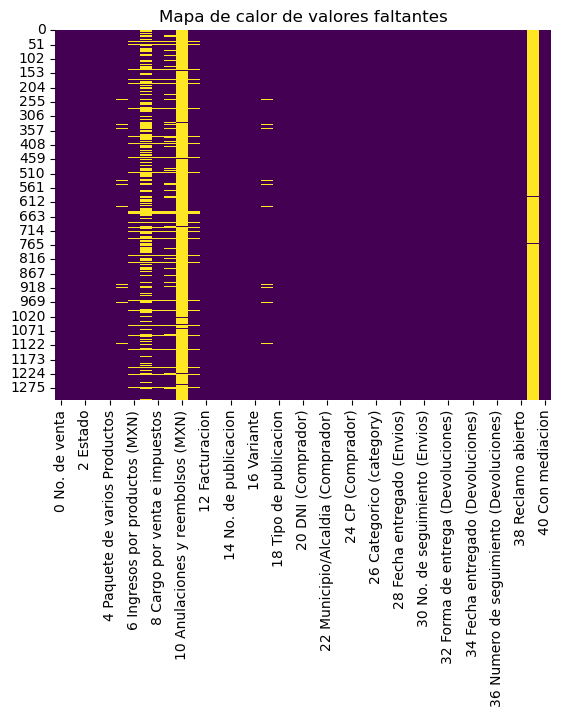

El DataFrame contiene valores NaN o null.


In [ ]:
valores_faltantes(df)

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?
    
    Si hay valores faltantes principalmente en dos columnas y con la grafica se puede identificar patrones de ausencia

In [ ]:
def estadisticas_resumidas(df):
    print("¿Cuáles son las estadísticas resumidas del conjunto de datos?")
    print(df.describe())

In [ ]:
estadisticas_resumidas(df)

¿Cuáles son las estadísticas resumidas del conjunto de datos?
        5 Unidades  6 Ingresos por productos (MXN)  \
count  1273.000000                     1223.000000   
mean      1.401414                      337.590270   
std       1.532119                      376.549723   
min       1.000000                       79.200000   
25%       1.000000                      169.000000   
50%       1.000000                      298.000000   
75%       1.000000                      399.000000   
max      20.000000                     3700.000000   

       7 Ingresos por envio (MXN)  8 Cargo por venta e impuestos  \
count                  676.000000                    1223.000000   
mean                    98.792293                    -101.181864   
std                     23.917701                     134.763888   
min                     21.000000                   -1425.920000   
25%                     99.000000                     -91.050000   
50%                     99.000000          

In [ ]:
def detectar_valores_atipicos(df):
    print("¿Hay valores atípicos en el conjunto de datos?")
    for col in df.select_dtypes(include=[np.number]).columns:
        sns.boxplot(x=df[col])
        plt.title(f'Detección de valores atípicos para {col}')
        plt.show()

¿Hay valores atípicos en el conjunto de datos?


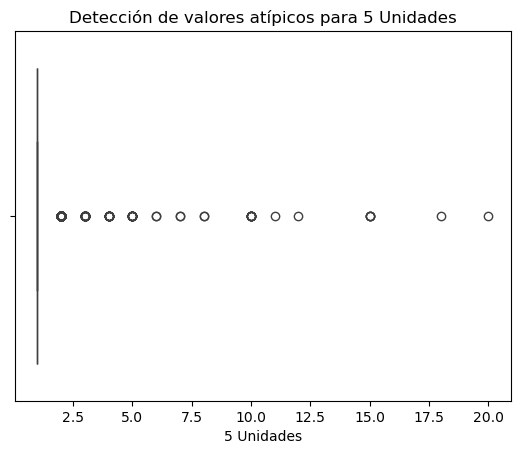

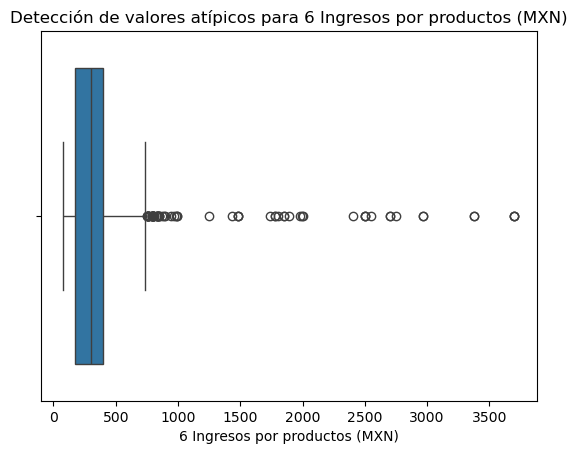

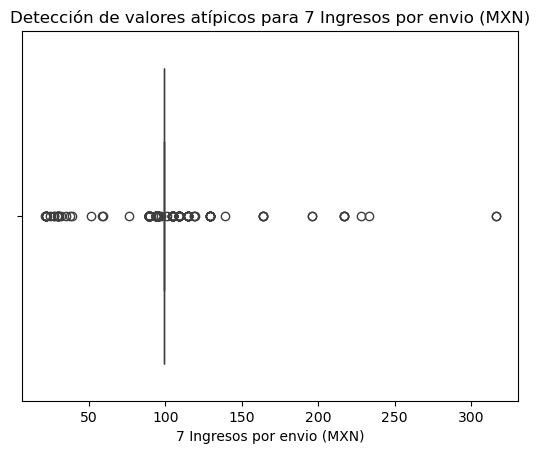

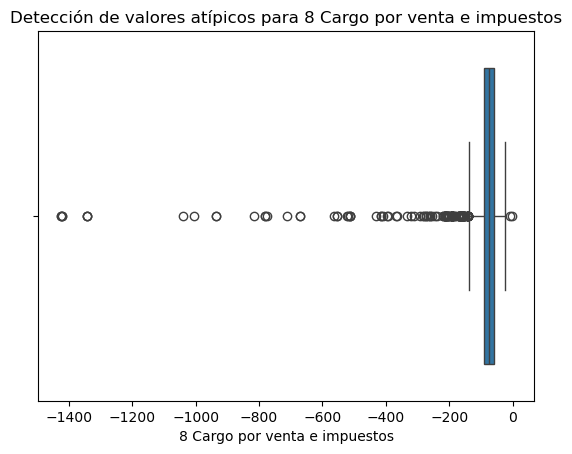

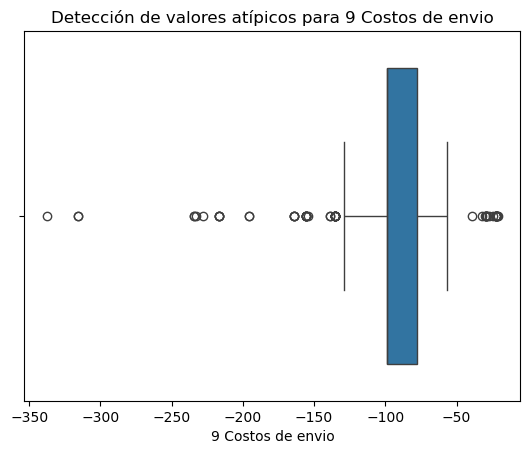

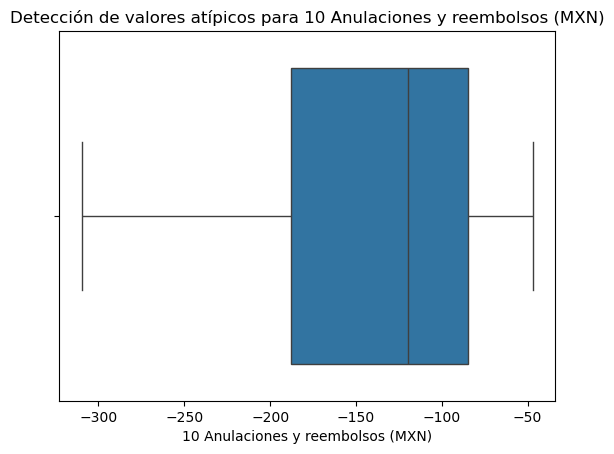

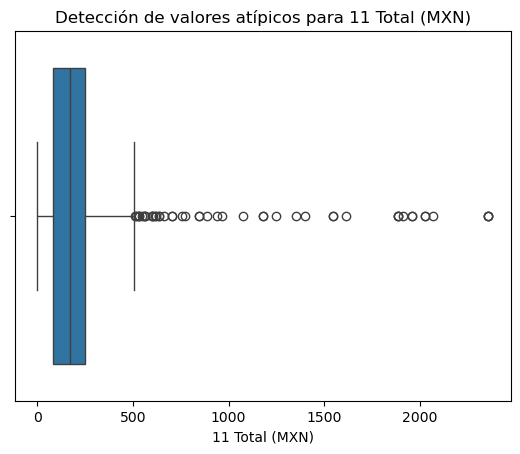

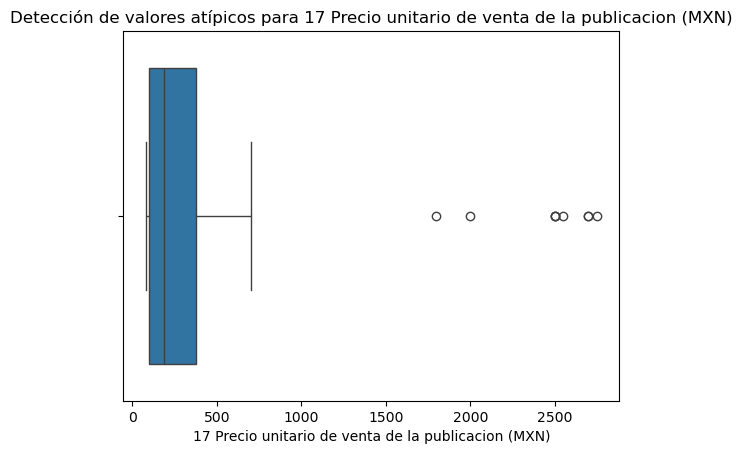

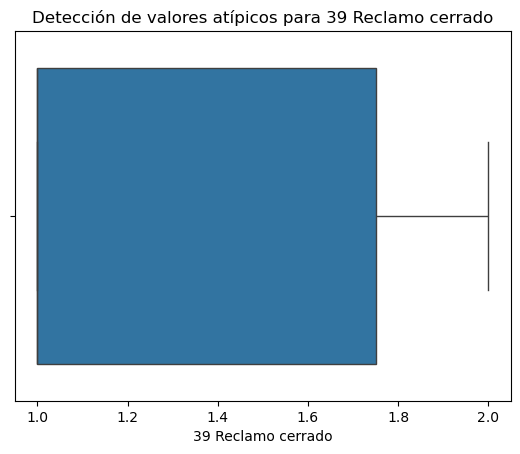

In [ ]:
detectar_valores_atipicos(df)

Los valores atipicos identificados de mayor importancia son
- Ingresos por producto
- Cargo por venta e impuestos
- Costos de envio

In [ ]:
def cardinalidad_variables_categoricas(df):
    print("¿Cuál es la cardinalidad de las variables categóricas?")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        print(f'{col}: {df[col].nunique()} categorías únicas')

In [ ]:
cardinalidad_variables_categoricas(df)

¿Cuál es la cardinalidad de las variables categóricas?
0 No. de venta: 1317 categorías únicas
1 Fecha de Venta: 1217 categorías únicas
2 Estado: 14 categorías únicas
3 Descripcion del estado: 188 categorías únicas
4 Paquete de varios Productos: 3 categorías únicas
12 Facturacion: 3 categorías únicas
13 SKU: 1 categorías únicas
14 No. de publicacion: 33 categorías únicas
15 Titulo de publicacion: 33 categorías únicas
16 Variante: 24 categorías únicas
18 Tipo de publicacion: 3 categorías únicas
19 Comprador (Comprador): 1162 categorías únicas
20 DNI (Comprador): 1 categorías únicas
21 Domicilio (Comprador): 1152 categorías únicas
22 Municipio/Alcaldia (Comprador): 332 categorías únicas
23 Estado (Comprador): 33 categorías únicas
24 CP (Comprador): 979 categorías únicas
25 Pais (Comprador): 3 categorías únicas
26 Categorico (category): 2 categorías únicas
27 Fecha en camino (Envios): 955 categorías únicas
28 Fecha entregado (Envios): 1151 categorías únicas
29 Transportista (Envios): 6 cat

In [ ]:
# Ignorar RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

def distribuciones_sesgadas(df):
    print("¿Existen distribuciones sesgadas en el conjunto de datos?")

    # Seleccionar solo columnas con tipos de datos Int64 o Float64
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Definir número de columnas para subplots
    num_cols = 3  # Columnas
    num_rows = int(np.ceil(len(numeric_cols) / num_cols))

    # Crear figura y ejes para subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

    for i, col in enumerate(numeric_cols):
        # Eliminar NaN antes de graficar
        valid_data = df[col].dropna()
        sns.histplot(valid_data, kde=True, bins=30, ax=axes[i])  # Ajustar el número de bins
        axes[i].set_title(f'Distribución de {col}')

    # Eliminar ejes vacíos
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()





¿Existen distribuciones sesgadas en el conjunto de datos?


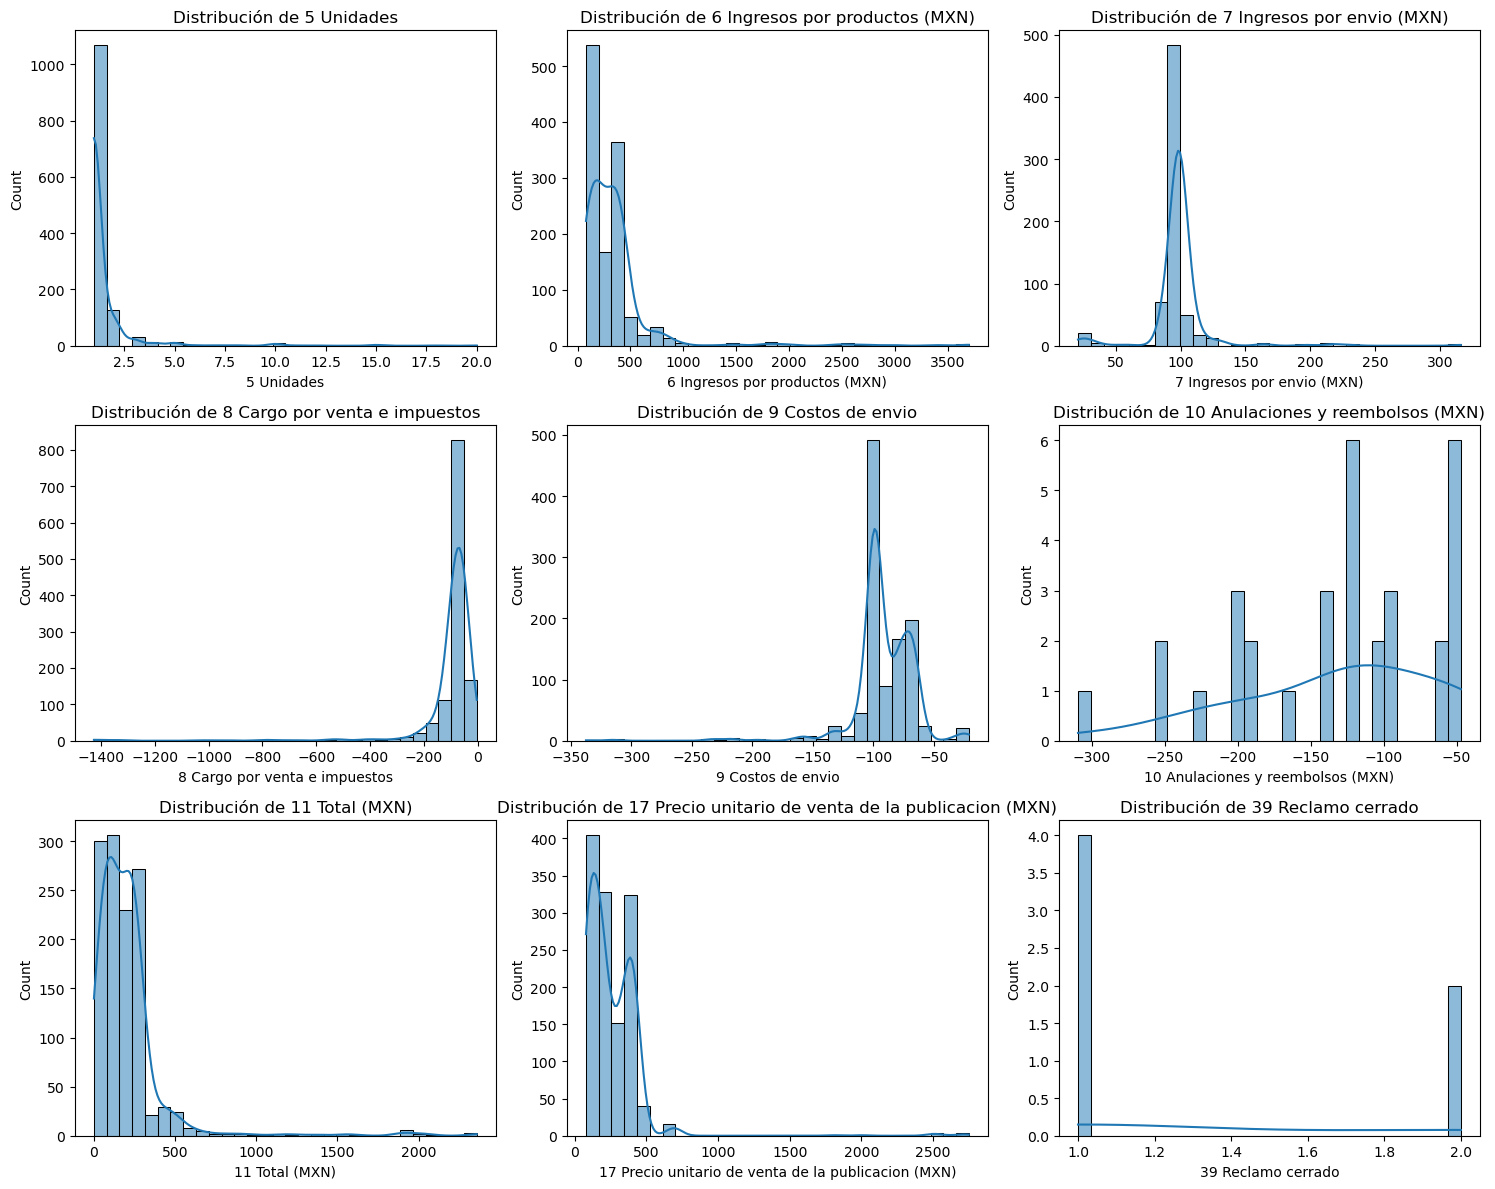

In [ ]:
distribuciones_sesgadas(df)

¿Necesitamos aplicar alguna transformación no lineal?

    Como podemos observar si se requiere transformar no lineal en algunas dist sesgadas una propuesta para ello es usar Power Transformer como se explica a continuacion

In [ ]:
def identificar_tendencias_temporales(df):
    if 'date' in df.columns:
        print("¿Se identifican tendencias temporales?")
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)
        df.resample('M').mean().plot()
        plt.title("Tendencias temporales de las variables")
        plt.show()
    else:
        print("No hay dimensión temporal en el conjunto de datos.")

In [ ]:
identificar_tendencias_temporales(df)

No hay dimensión temporal en el conjunto de datos.


Si hay tendencias temporales pero debido a que el tipo de dato es object el codigo anterior no lo detecta

In [ ]:
def correlacion_entre_variables(df):
    print("¿Hay correlación entre las variables dependientes e independientes?")

    # Calcular la matriz de correlación solo para columnas numéricas
    correlation_matrix = df.corr(numeric_only=True)

    # Crear el mapa de calor
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Matriz de correlación")
    plt.show()

¿Hay correlación entre las variables dependientes e independientes?


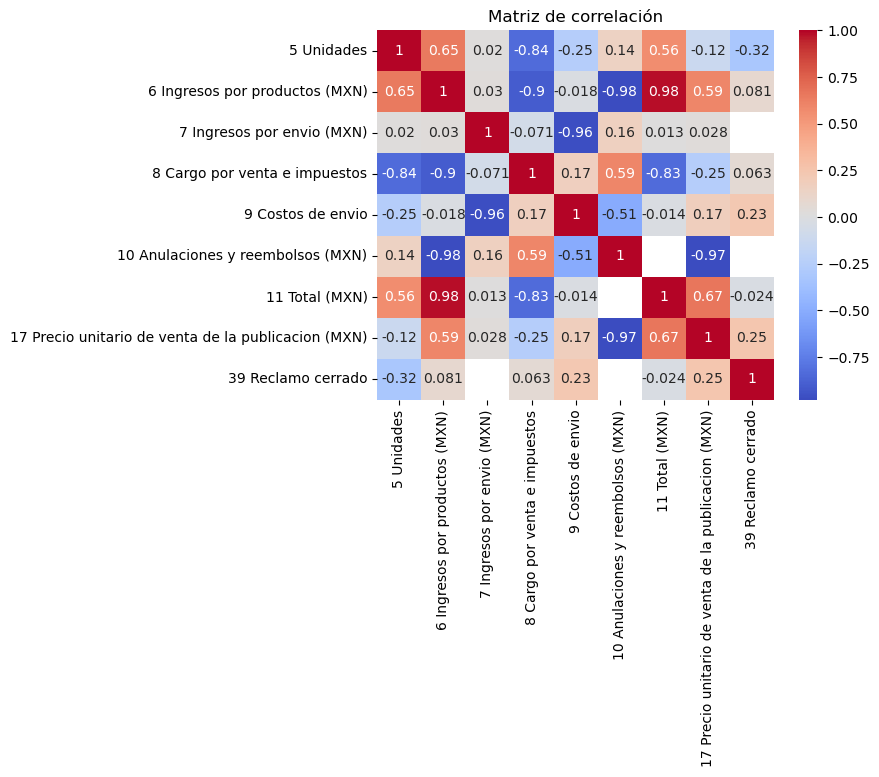

In [ ]:
correlacion_entre_variables(df)

Como podemos observar si hay correlacion entre variables como cargos e impuestos con anulaciones entre otros.

In [ ]:
def recortar_categoria(categoria):
    # Limitar la longitud a 20 caracteres
    return categoria[:10] if len(categoria) > 10 else categoria

def distribucion_por_categorias(df):
    print("¿Cómo se distribuyen los datos en función de diferentes categorías?")
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        # Aplicar la función de recorte a las categorías
        df[col] = df[col].apply(recortar_categoria)

        sns.countplot(x=col, data=df)
        plt.title(f'Distribución de la categoría {col}')
        plt.xticks(rotation=90)  # Rotar los nombres de las categorías verticalmente
        plt.show()

¿Cómo se distribuyen los datos en función de diferentes categorías?


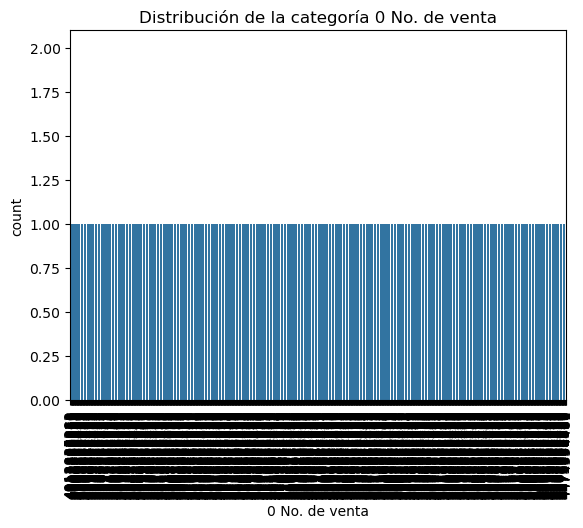

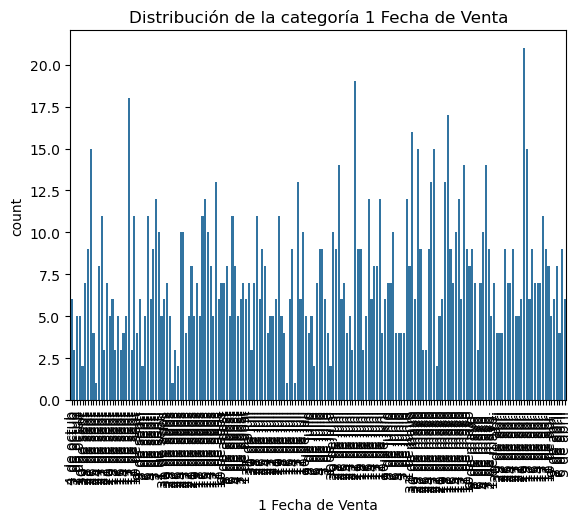

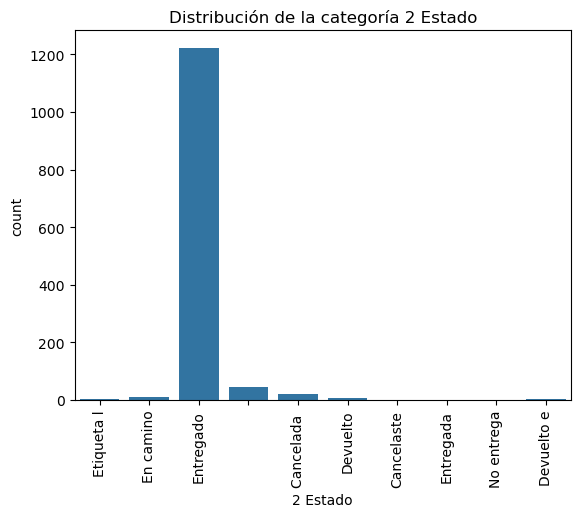

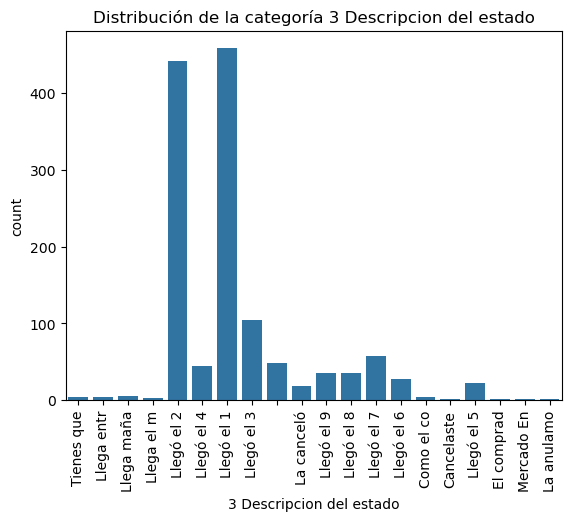

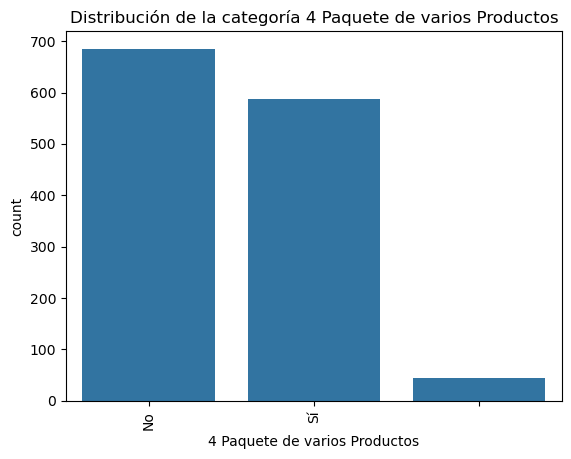

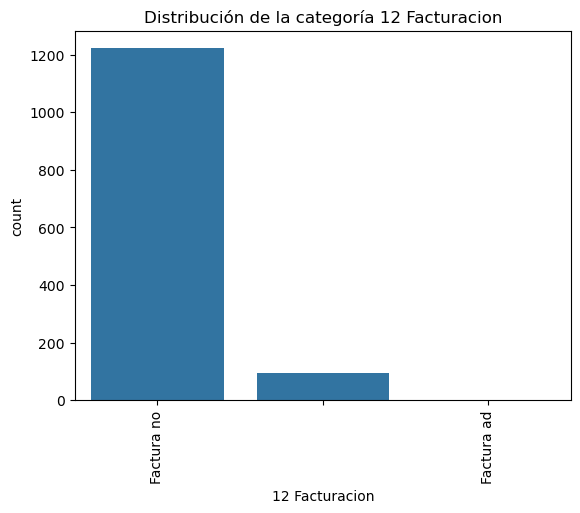

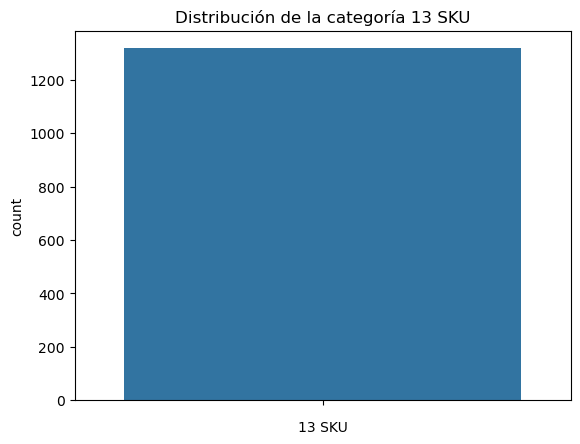

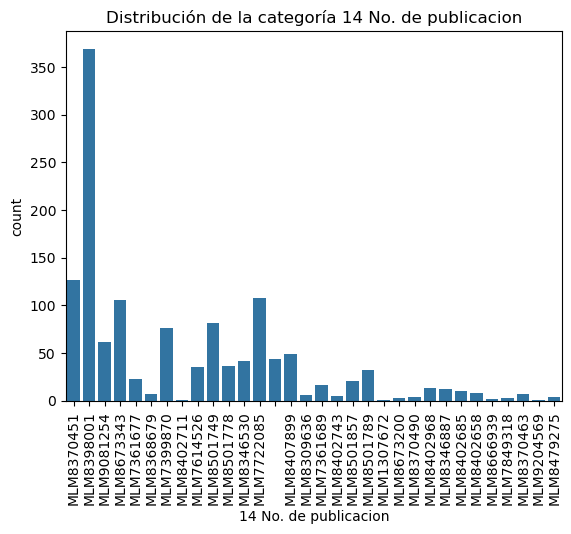

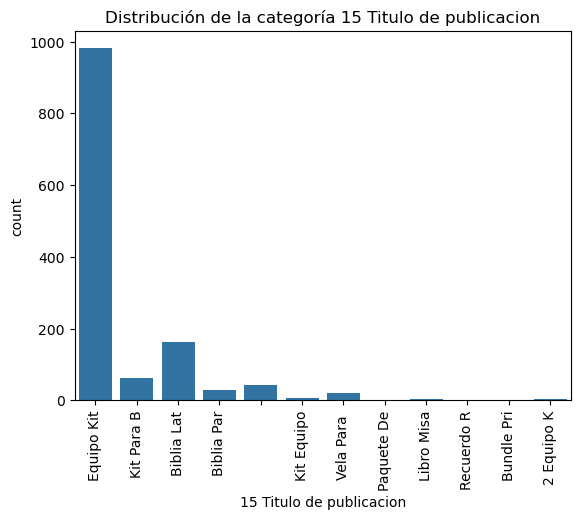

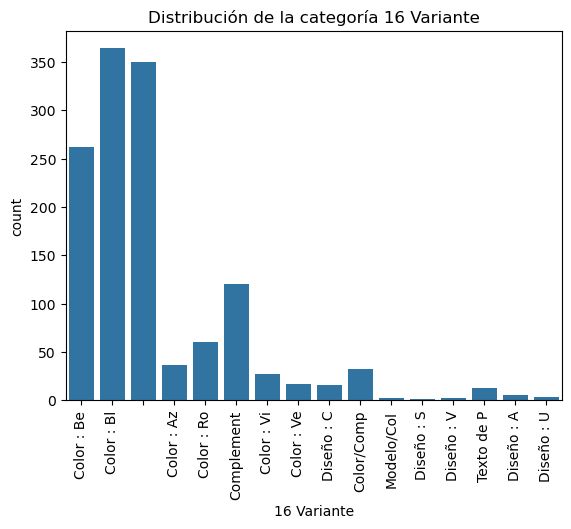

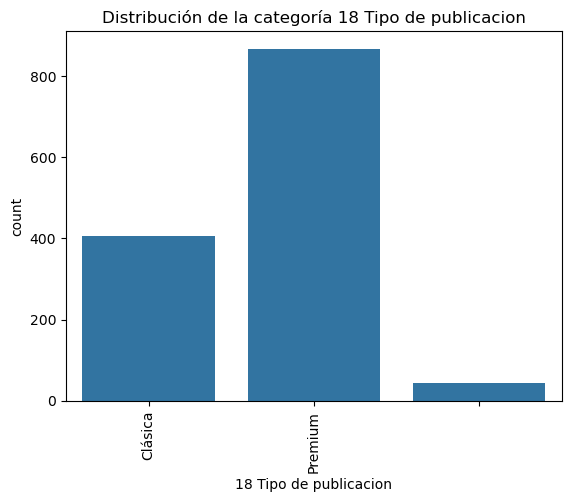

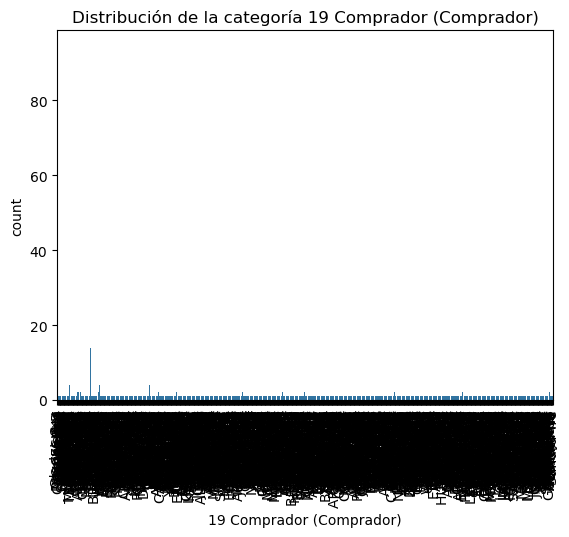

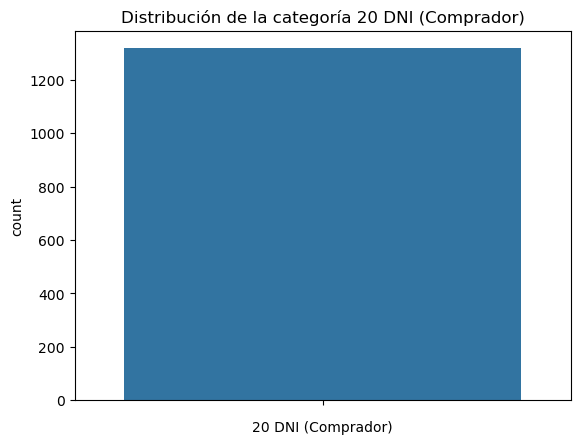

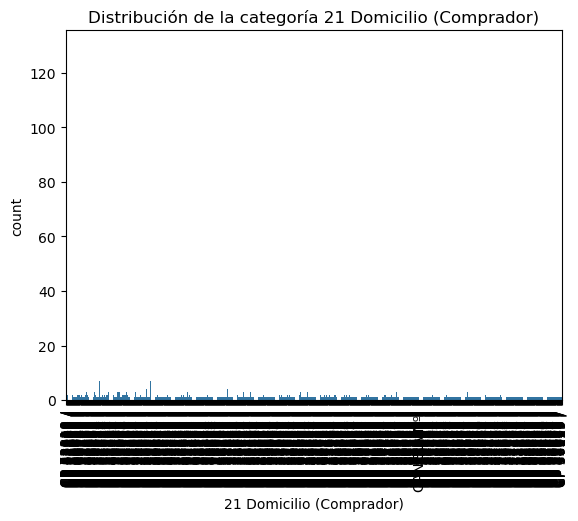

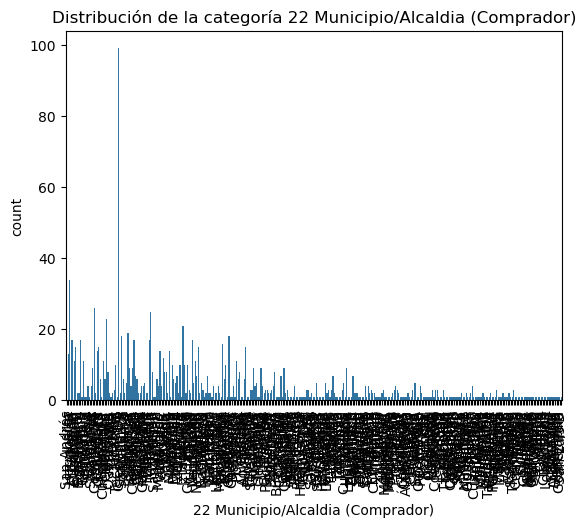

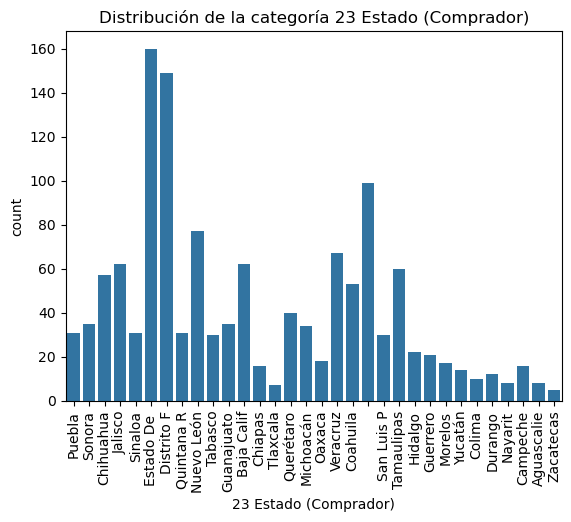

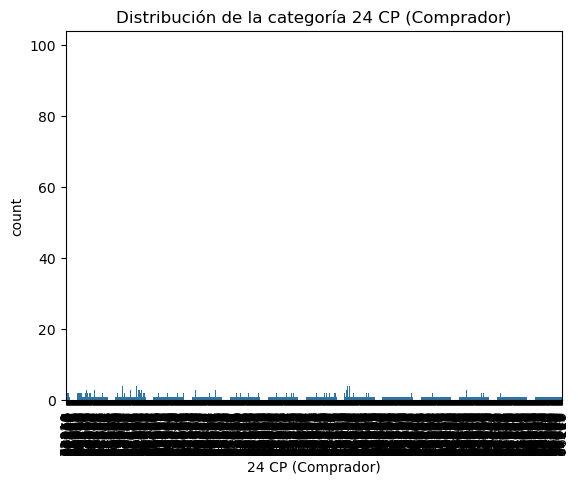

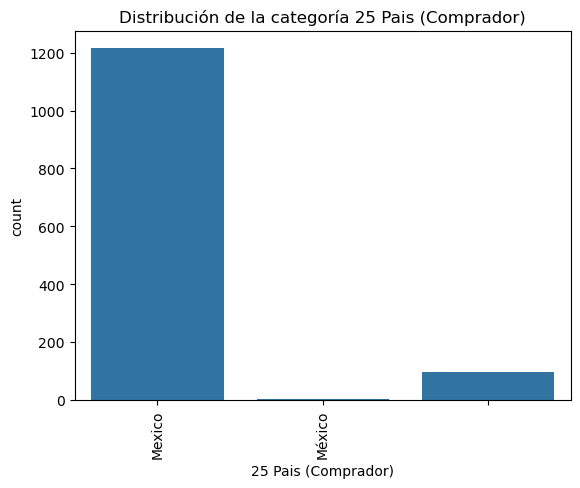

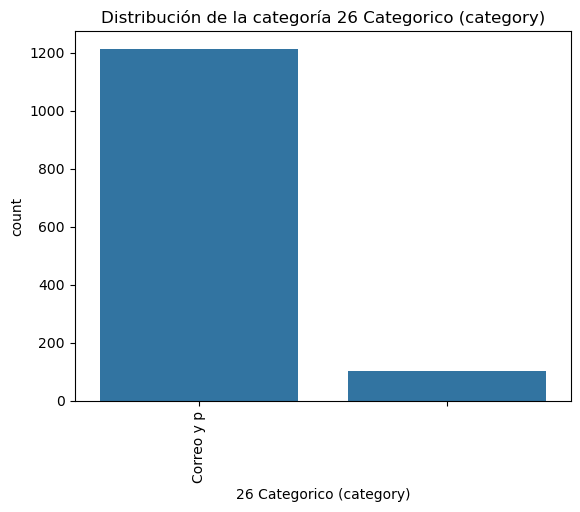

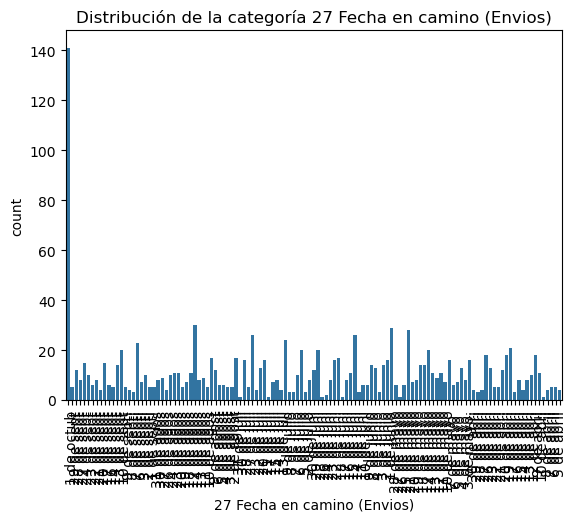

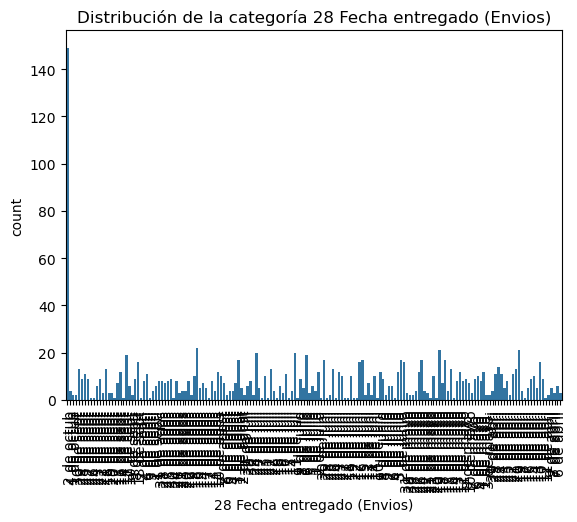

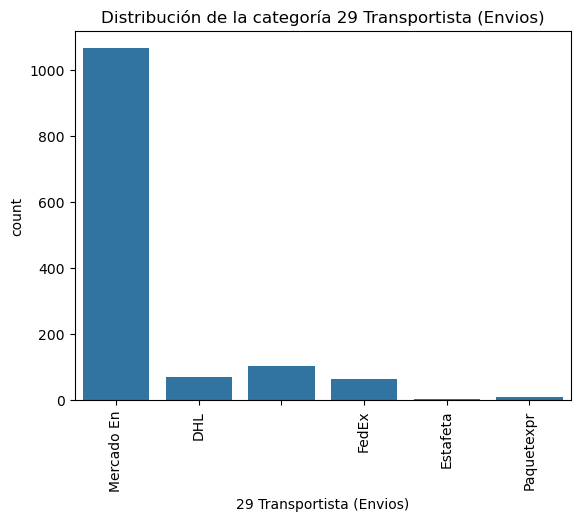

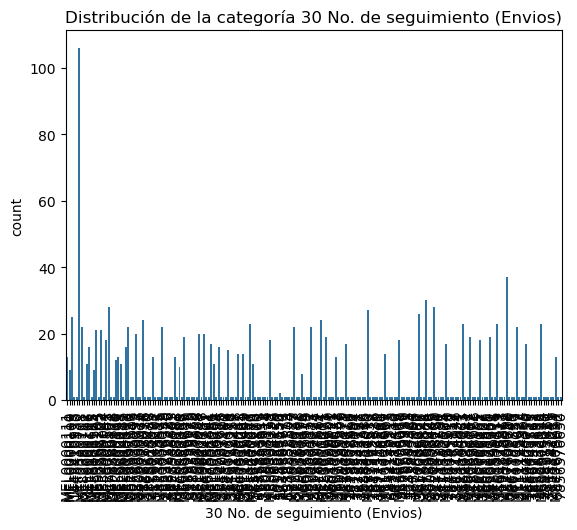

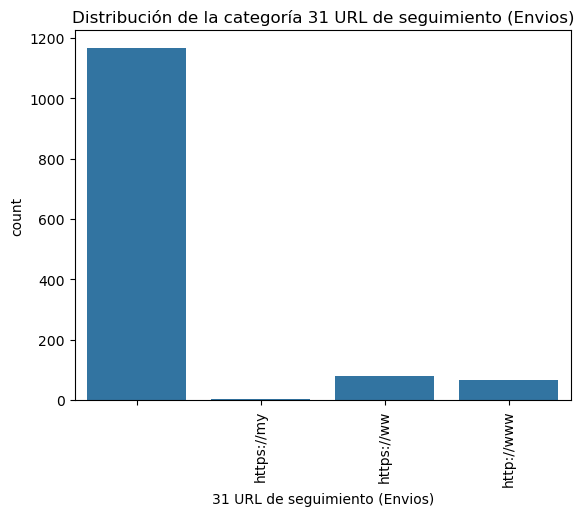

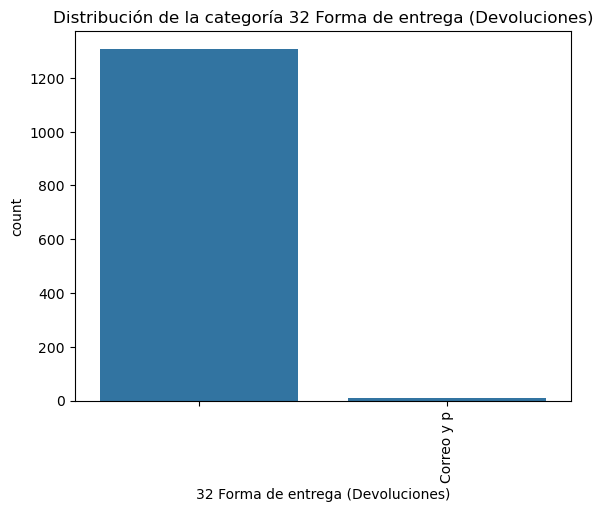

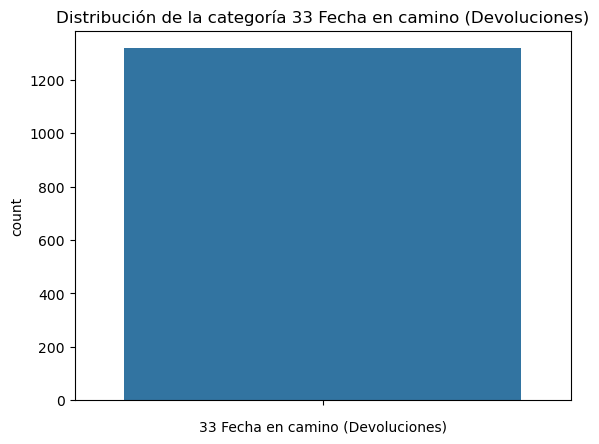

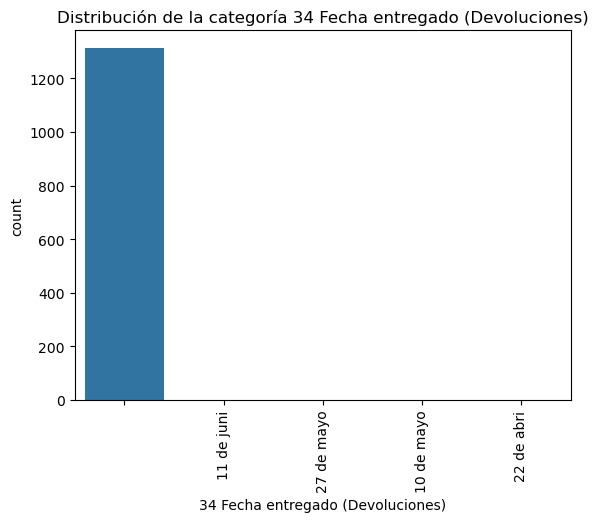

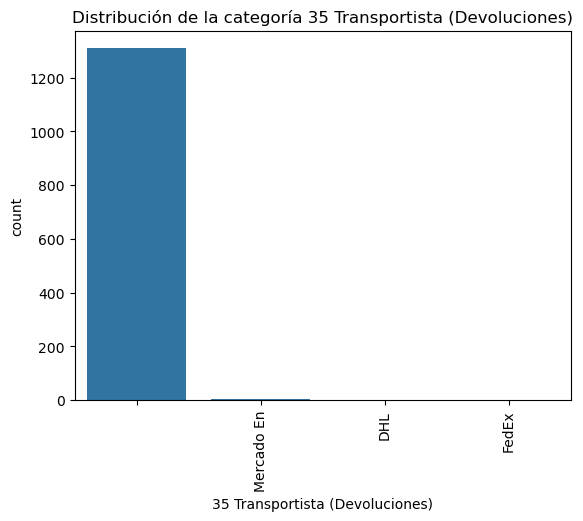

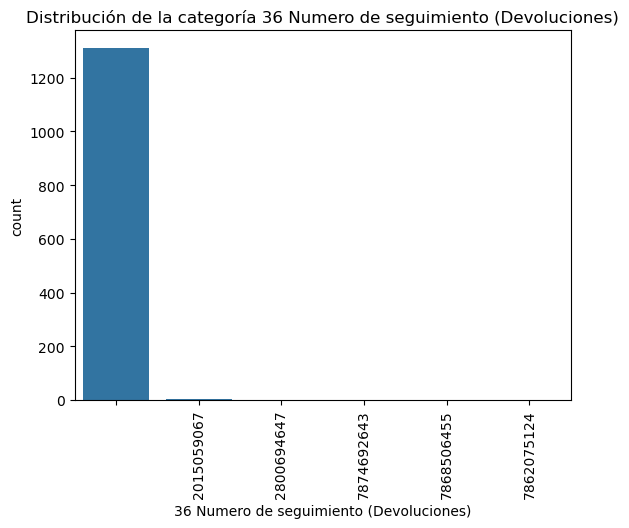

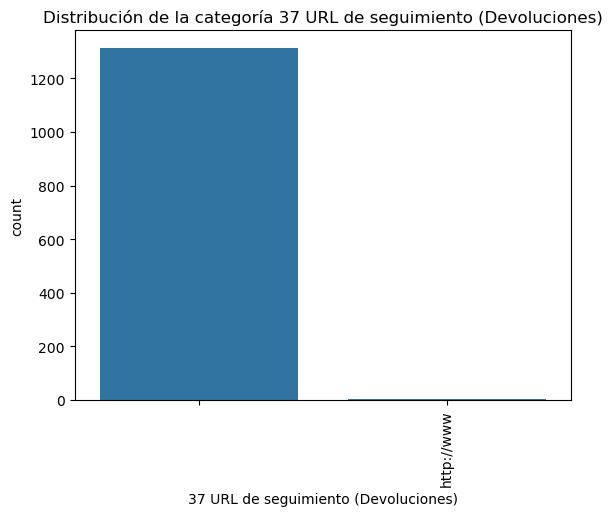

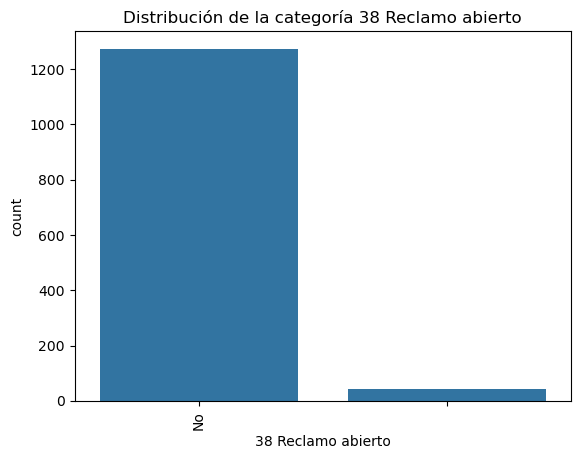

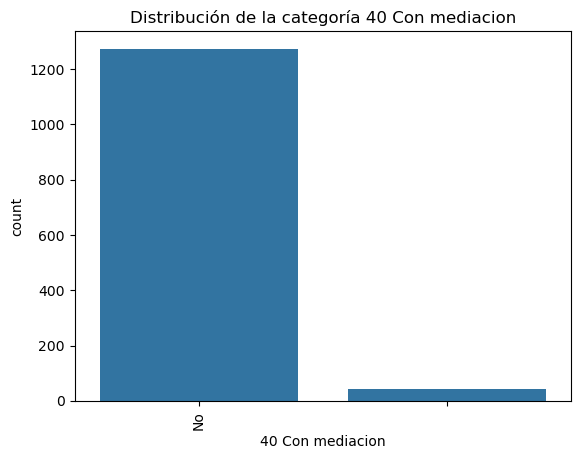

In [ ]:
distribucion_por_categorias(df)

Como podemos ver las categorias tienen diferentes distribuciones como se observa en su cardinalidad antes mencionada

In [ ]:
# Ignorar RuntimeWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
def patrones_agrupaciones(df):
    print("¿Existen patrones o agrupaciones (clusters) en los datos con características similares?")

    # Seleccionar solo columnas numéricas
    num_cols = df.select_dtypes(include=[np.number])

    # Tomar solo las últimas 7 columnas numéricas
    if len(num_cols.columns) < 7:
        print("El DataFrame tiene menos de 7 columnas numéricas. Se utilizarán todas las disponibles.")
        selected_cols = num_cols.copy()  # Hacer una copia explícita
    else:
        selected_cols = num_cols.iloc[:, -7:].copy()  # Hacer una copia explícita

    # Aplicar K-means
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(selected_cols)

    # Agregar los clusters al DataFrame seleccionado
    selected_cols['Cluster'] = clusters

    # Graficar las agrupaciones usando pairplot
    sns.pairplot(selected_cols, hue='Cluster', palette='viridis')
    plt.suptitle("Visualización de Clusters en las Últimas 7 Columnas", y=1.02)  # Ajustar el título
    plt.show()

In [ ]:
# Manejo de excepciones para detectar NaN
try:
        # Comprobar si hay algún valor NaN en el DataFrame
    if df.isnull().values.any():
        raise ValueError("El DataFrame contiene valores NaN.")
    else:
        patrones_agrupaciones(df)
except ValueError as e:
    print(f"Excepción capturada: {e}")

Excepción capturada: El DataFrame contiene valores NaN.


En estos patrones de agrupacion vemos que por los valores NaN no es posible ver la grafica pero si xisten patrones o agrupaciones (clusters) en los datos con características similares, por ejemplo si los agrupamos por estado o cp, podremos ver geograficamente las ventas por estados

In [ ]:
def analizar_desequilibrio_clases(df, variable_target):
    """
    Analiza el desequilibrio en las clases de la variable objetivo.

    Parameters:
    df (pd.DataFrame): El DataFrame que contiene la variable objetivo.
    variable_target (str): El nombre de la columna que representa la variable objetivo.

    Returns:
    dict: Un diccionario con la distribución de clases y un indicador de desequilibrio.
    """
    # Calcular la distribución de clases
    distribucion_clases = df[variable_target].value_counts(normalize=True) * 100

    # Identificar si hay desequilibrio
    desequilibrio = any(distribucion_clases < 20)  # Se puede ajustar el umbral

    # Mostrar la distribución de clases
    print("Distribución de Clases:")
    print(distribucion_clases)
    print(f"\n¿Hay desequilibrio en las clases? {'Sí' if desequilibrio else 'No'}\n")

    # Graficar la distribución de clases
    plt.figure(figsize=(8, 5))
    sns.barplot(x=distribucion_clases.index, y=distribucion_clases.values)
    plt.title(f'Distribución de Clases: {variable_target}')
    plt.xlabel(variable_target)
    plt.ylabel('Porcentaje (%)')
    plt.xticks(rotation=45)
    plt.show()

    return {
        'Distribución de Clases': distribucion_clases,
        'Desequilibrio': desequilibrio
    }

Distribución de Clases:
Estado De     12.148823
Distrito F    11.313591
               7.517084
Nuevo León     5.846621
Veracruz       5.087320
Jalisco        4.707669
Baja Calif     4.707669
Tamaulipas     4.555809
Chihuahua      4.328018
Coahuila       4.024298
Querétaro      3.037206
Guanajuato     2.657555
Sonora         2.657555
Michoacán      2.581625
Puebla         2.353834
Quintana R     2.353834
Sinaloa        2.353834
Tabasco        2.277904
San Luis P     2.277904
Hidalgo        1.670463
Guerrero       1.594533
Oaxaca         1.366743
Morelos        1.290812
Chiapas        1.214882
Campeche       1.214882
Yucatán        1.063022
Durango        0.911162
Colima         0.759301
Nayarit        0.607441
Aguascalie     0.607441
Tlaxcala       0.531511
Zacatecas      0.379651
Name: 23 Estado (Comprador), dtype: float64

¿Hay desequilibrio en las clases? Sí



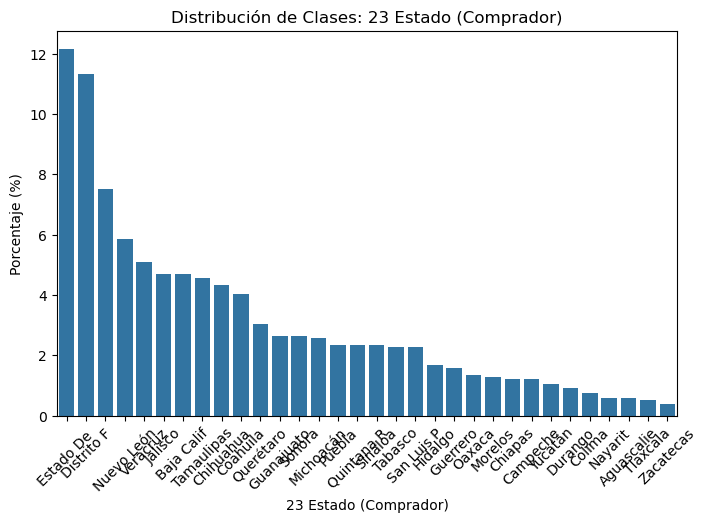

{'Distribución de Clases': Estado De     12.148823
 Distrito F    11.313591
                7.517084
 Nuevo León     5.846621
 Veracruz       5.087320
 Jalisco        4.707669
 Baja Calif     4.707669
 Tamaulipas     4.555809
 Chihuahua      4.328018
 Coahuila       4.024298
 Querétaro      3.037206
 Guanajuato     2.657555
 Sonora         2.657555
 Michoacán      2.581625
 Puebla         2.353834
 Quintana R     2.353834
 Sinaloa        2.353834
 Tabasco        2.277904
 San Luis P     2.277904
 Hidalgo        1.670463
 Guerrero       1.594533
 Oaxaca         1.366743
 Morelos        1.290812
 Chiapas        1.214882
 Campeche       1.214882
 Yucatán        1.063022
 Durango        0.911162
 Colima         0.759301
 Nayarit        0.607441
 Aguascalie     0.607441
 Tlaxcala       0.531511
 Zacatecas      0.379651
 Name: 23 Estado (Comprador), dtype: float64,
 'Desequilibrio': True}

In [ ]:
variable_target = '15 Titulo de publicacion'
variable_target = '23 Estado (Comprador)'
analizar_desequilibrio_clases(df, variable_target)

¿Hay desequilibrio en las clases?

Si hay desiquilibrio de clases debido a que durante este analisis las ventas de los productos se venden mas unos productos que otros ademas de que depende la zona geografica se venden mas unos que otros, esto es normal por lo que quitar los categoricos que no nos interesan y dejar los valores numericos y algunas categorias nos ayudaria a equilibrar las clases para no tener subreaprendizaje o lo contrario durante el entrenamiento del modelos

### Acciones de seleccion y  limpieza de acuerdo al modelo Crisp-ML

De acuerdo al modelo Crisp-ML se realizo la exploracion de datos, para tomar las decisiones de limpieza y seleccion de datos

In [ ]:
# Establecer la configuración regional en español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [ ]:
# Función para convertir la fecha
def convertir_fecha(fecha_str):
    fecha_obj = datetime.strptime(fecha_str, "%d de %B de %Y %H:%M hs.")
    return fecha_obj.strftime("%d/%m/%Y")

In [ ]:
# Aplicar la función a la columna 'fechas'
df['1 Fecha de Venta'] = df['1 Fecha de Venta'].apply(convertir_fecha)


- Se eliminaron ciertas categorias porque estan vacias o valores nulos ademas de otras por su no relevancias para cumplir el obetivo del caso de uso confirmar registros contables

Eliminar las columnas:
- 0 No. de venta
- 2 Estado
- 3 Descripcion del estado
- 4 Paquete de varios Productos
- 10 Anulaciones y reembolsos (MXN)
- 12 Facturacion
- 13 SKU
- 14 No. de publicacion
- 19 Comprador (Comprador)
- 20 DNI (Comprador)
- 21 Domicilio (Comprador)
- 25 Pais (Comprador)
- 26 Categorico (category)
- 27 Fecha en camino (Envios)
- 28 Fecha entregado (Envios)
- 30 No. de seguimiento (Envios)
- 31 URL de seguimiento (Envios)
- 32 Forma de entrega (Devoluciones)
- 33 Fecha en camino (Devoluciones)
- 34 Fecha entregado (Devoluciones)
- 36 Numero de seguimiento (Devoluciones)
- 37 URL de seguimiento (Devoluciones)
- 38 Reclamo abierto
- 39 Reclamo cerrado
- 40 Con mediacion

In [ ]:
columnas_a_eliminar = [0, 2, 3, 4, 10, 12, 13, 14, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40]

In [ ]:
# Eliminar las columnas por indexación
df = df.drop(df.columns[columnas_a_eliminar], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   1 Fecha de Venta                                     1317 non-null   object 
 1   5 Unidades                                           1273 non-null   float64
 2   6 Ingresos por productos (MXN)                       1223 non-null   float64
 3   7 Ingresos por envio (MXN)                           676 non-null    float64
 4   8 Cargo por venta e impuestos                        1223 non-null   float64
 5   9 Costos de envio                                    1095 non-null   float64
 6   11 Total (MXN)                                       1223 non-null   float64
 7   15 Titulo de publicacion                             1317 non-null   object 
 8   16 Variante                                          1317 non-null  

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
5 Unidades                                              44
6 Ingresos por productos (MXN)                          94
7 Ingresos por envio (MXN)                             641
8 Cargo por venta e impuestos                           94
9 Costos de envio                                      222
11 Total (MXN)                                          94
17 Precio unitario de venta de la publicacion (MXN)     44
dtype: int64


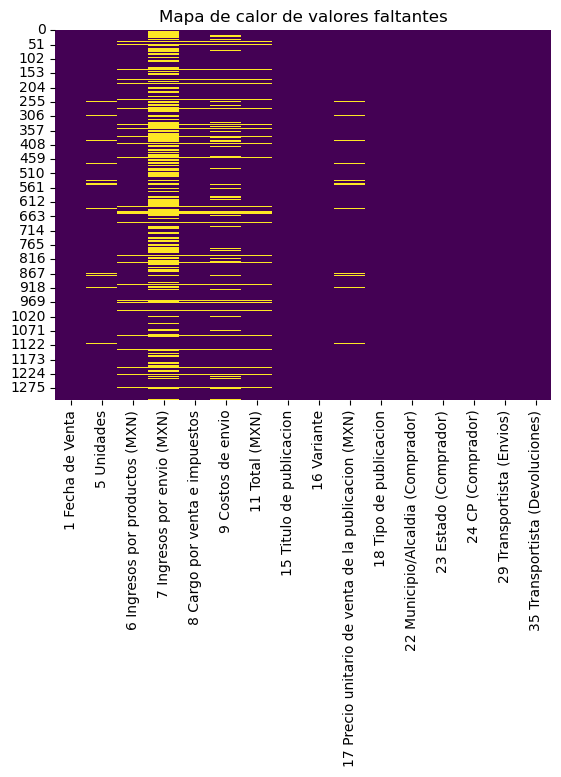

El DataFrame contiene valores NaN o null.


In [ ]:
valores_faltantes(df)

Como sigue teneiendo valores faltantes vamos a llenarlos con 0

In [ ]:
# Despues de eliminar dos columnas vemos que exist un patron en otras que son utiles por lo que
# Rellenar los NaN con un valor, por ejemplo 0
df = df.fillna(0)

print(df)

     1 Fecha de Venta  5 Unidades  6 Ingresos por productos (MXN)  \
0          04/10/2021         1.0                           399.0   
1          04/10/2021         2.0                           198.0   
2          04/10/2021        10.0                          3700.0   
3          04/10/2021        10.0                          3700.0   
4          04/10/2021         1.0                           396.0   
...               ...         ...                             ...   
1312       05/04/2021         1.0                            99.0   
1313       05/04/2021         1.0                            99.0   
1314       05/04/2021         1.0                           189.0   
1315       05/04/2021         1.0                           349.0   
1316       05/04/2021         1.0                           210.0   

      7 Ingresos por envio (MXN)  8 Cargo por venta e impuestos  \
0                            0.0                         -90.81   
1                          129.0     

¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia? 
Series([], dtype: int64)


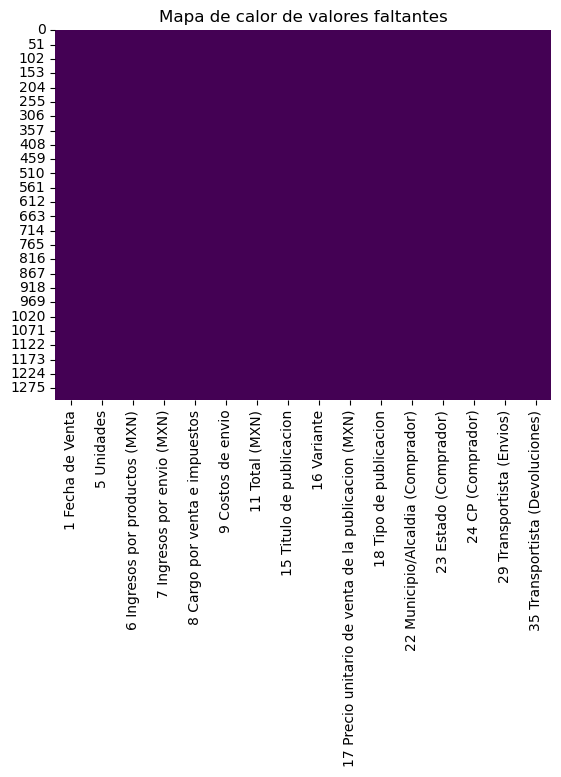

El DataFrame no tiene valores NaN o null.


In [ ]:
valores_faltantes(df)

Como podemos visualizar ya no hay valores null o NaN pero ahora debemos convertir el data type a fecha o categorico en caso de que aplique para poder realizar los siguientes analisis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   1 Fecha de Venta                                     1317 non-null   object 
 1   5 Unidades                                           1317 non-null   float64
 2   6 Ingresos por productos (MXN)                       1317 non-null   float64
 3   7 Ingresos por envio (MXN)                           1317 non-null   float64
 4   8 Cargo por venta e impuestos                        1317 non-null   float64
 5   9 Costos de envio                                    1317 non-null   float64
 6   11 Total (MXN)                                       1317 non-null   float64
 7   15 Titulo de publicacion                             1317 non-null   object 
 8   16 Variante                                          1317 non-null  

In [ ]:
def transformar_columna(df, index_col, tipo):
    """
    Transforma el tipo de una columna en un DataFrame.

    Args:
    df: DataFrame de pandas
    index_col: índice de la columna a transformar
    tipo: tipo de dato a convertir ('datetime64' o 'category')

    Returns:
    DataFrame con la columna transformada
    """
    # Verificar si el índice es válido
    if index_col < 0 or index_col >= df.shape[1]:
        raise ValueError("Índice de columna fuera de rango.")

    # Obtener el nombre de la columna por índice
    nombre_columna = df.columns[index_col]

    # Transformar la columna según el tipo especificado
    if tipo == 'datetime64':
        df[nombre_columna] = pd.to_datetime(df[nombre_columna], errors='coerce')
    elif tipo == 'category':
        df[nombre_columna] = df[nombre_columna].astype('category')
    else:
        raise ValueError("Tipo de dato no válido. Usa 'datetime64' o 'category'.")

    return df

In [ ]:
# Usar la función para transformar la columna en datetime64
df_transformado_datetime = transformar_columna(df, index_col=0, tipo='datetime64')

C:\Users\Professional\AppData\Local\Temp\ipykernel_18656\149718503.py:22: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[nombre_columna] = pd.to_datetime(df[nombre_columna], errors='coerce')


In [ ]:
df_transformado_datetime = transformar_columna(df, index_col=7, tipo='category')

In [ ]:
df_transformado_datetime = transformar_columna(df, index_col=8, tipo='category')

In [ ]:
df_transformado_datetime = transformar_columna(df, index_col=10, tipo='category')

In [ ]:
df_transformado_datetime = transformar_columna(df, index_col=12, tipo='category')

In [ ]:
df_transformado_datetime = transformar_columna(df, index_col=14, tipo='category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   1 Fecha de Venta                                     1317 non-null   datetime64[ns]
 1   5 Unidades                                           1317 non-null   float64       
 2   6 Ingresos por productos (MXN)                       1317 non-null   float64       
 3   7 Ingresos por envio (MXN)                           1317 non-null   float64       
 4   8 Cargo por venta e impuestos                        1317 non-null   float64       
 5   9 Costos de envio                                    1317 non-null   float64       
 6   11 Total (MXN)                                       1317 non-null   float64       
 7   15 Titulo de publicacion                             1317 non-null   category      
 8 

Como podemos apreciar ahora tenemos el DF con el tipo de dato adecuado y sin NaN o Null

# Ingeniería de características (Avance 2)

In [ ]:
df_caracterizado = df.copy() #Definimos un DataFrame para usar como BD

Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:

Fórmula de Normalización

La normalización de un valor x se puede calcular usando la siguiente fórmula:

normalized = (2 * (x - min)) / (max - min) - 1

Donde:
- x es el valor a normalizar.
- min es el valor mínimo de la columna.
- max es el valor máximo de la columna.

Proceso de Normalización
1. Encontrar el valor mínimo y máximo de la columna.
2. Aplicar la fórmula a cada valor en la columna para escalarlo al rango de -1 a 1.


In [ ]:
# Normalizar cada columna del DataFrame
def normalizar_columna(col):
    min_val = col.min()
    max_val = col.max()
    return 2 * (col - min_val) / (max_val - min_val) - 1

In [ ]:
# Aplicar la normalización a cada columna numérica
df_normalizado = df_rellenado.apply(lambda col: normalizar_columna(col) if col.dtype in ['int64', 'float64'] else col)
# Eliminar columnas que contienen NaN
df_normalizado = df_normalizado.dropna(axis=1)
# Mostrar el DataFrame normalizado
print("DataFrame normalizado:")
print(df_normalizado)

# Power Transformer

## ¿Qué es el Power Transformer?

El **Power Transformer** es una técnica de preprocesamiento utilizada en el ámbito del aprendizaje automático y la estadística para transformar variables que no siguen una distribución normal (también conocidas como distribuciones sesgadas) en variables que se asemejan más a una distribución normal. Este método es parte del módulo `sklearn.preprocessing` de Scikit-learn.

El Power Transformer aplica una transformación que busca estabilizar la varianza y hacer que los datos sean más gaussianos (distribución normal) a través de un conjunto de transformaciones de potencias.

## ¿Cómo funciona el Power Transformer?

El Power Transformer utiliza diferentes transformaciones según el valor de la variable:

- Para valores positivos, utiliza la **transformación de Box-Cox**.
- Para valores negativos y cero, utiliza la **transformación de Yeo-Johnson**.

### Proceso de Transformación

1. **Ajustar el Transformer**: Se ajusta el transformer a los datos de entrada para calcular los parámetros necesarios.
2. **Transformar los Datos**: Se aplican las transformaciones a los datos originales basándose en los parámetros calculados durante el ajuste.


In [ ]:
    print("¿Necesitamos aplicar alguna transformación no lineal?")

    for col in numeric_cols:
        # Aplicar PowerTransformer solo si hay suficientes datos válidos
        valid_data = df[col].dropna()
        if valid_data.shape[0] > 0:  # Verificar que hay datos disponibles
            pt = PowerTransformer()
            transformed_data = pt.fit_transform(valid_data.values.reshape(-1, 1))  # Ajustar la forma de los datos

            # Gráficar la transformación no lineal
            sns.histplot(transformed_data, kde=True, bins=30)  # Ajustar el número de bins
            plt.title(f'Transformación no lineal para {col}')
            plt.show()
            plt.pause(0.1)  # Pausa breve para mejorar el rendimiento

Ingresar el metodo para verificar si hay datos temporales